<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/09-decision-trees/04_regression_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Decision trees for regression

Consider the following problem: we have an app, and we want to predict the level of engagement
of the users in terms of how many days per week they used it. The only feature we have is the
user’s age.

|Age|Engagement|
|-|-|
|10|7|
|20|5|
|30|7|
|40|1|
|50|2|
|60|1|
|70|5|
|80|4|

From this dataset, it seems that we have three clusters of users. The young users (ages 10, 20, 30)
use the app a lot, the middle-aged users (ages 40, 50, 60) don’t use it very much, and the older
users (ages 70, 80) use it sometimes. 

Thus, a prediction like this one would make sense.

##Setup

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.simplefilter("ignore", UserWarning)

random.seed(0)

In [ ]:
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_9_Decision_Trees/utils.py

Ref: https://www.kaggle.com/product-feedback/158412

In [3]:
import utils
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [13]:
import warnings
warnings.simplefilter("ignore", RuntimeWarning)

##Dataset

Let's create the dataset.

In [4]:
features = [[10],[20],[30],[40],[50],[60],[70],[80]]
labels = [7,5,7,1,2,1,5,4]

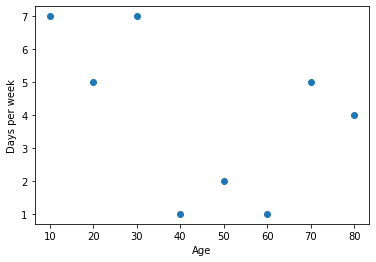

In [5]:
plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

##Decision tree

The algorithm used for training a regression decision tree is very similar to the
one we used for training a classification decision tree. 

The only difference is that for classification
trees, we used accuracy, Gini index, or entropy, and for regression trees, we use the mean square error (MSE).

Now, we build a regression decision tree of maximum depth 2.

In [8]:
dt_regressor = DecisionTreeRegressor(max_depth=2)

dt_regressor.fit(features, labels)

DecisionTreeRegressor(max_depth=2)

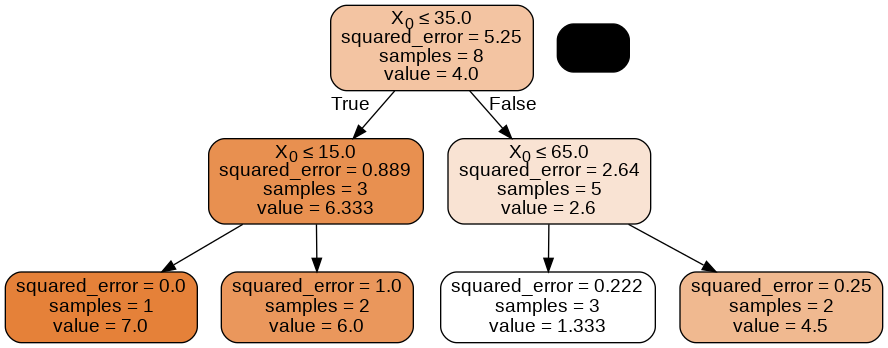

In [9]:
utils.display_tree(dt_regressor)

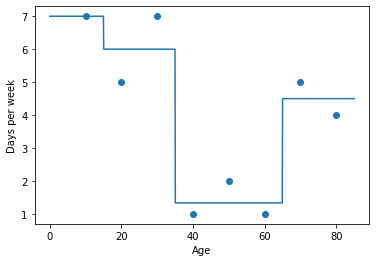

In [11]:
utils.plot_regressor(dt_regressor, features, labels)

##Finding the first split

In [14]:
for i in range(0, 9):
  left = np.array(labels[:i])
  right = np.array(labels[i:])
  print("******")
  print(left, right)
  print(np.mean(left), np.mean(right))
  left_tse = left - np.mean(left)
  right_tse = right - np.mean(right)
  print(1 / 8 * (np.dot(left_tse, left_tse) + np.dot(right_tse, right_tse)))

******
[] [7 5 7 1 2 1 5 4]
nan 4.0
5.25
******
[7] [5 7 1 2 1 5 4]
7.0 3.5714285714285716
3.9642857142857144
******
[7 5] [7 1 2 1 5 4]
6.0 3.3333333333333335
3.916666666666667
******
[7 5 7] [1 2 1 5 4]
6.333333333333333 2.6
1.9833333333333334
******
[7 5 7 1] [2 1 5 4]
5.0 3.0
4.25
******
[7 5 7 1 2] [1 5 4]
4.4 3.3333333333333335
4.983333333333333
******
[7 5 7 1 2 1] [5 4]
3.8333333333333335 4.5
5.166666666666667
******
[7 5 7 1 2 1 5] [4]
4.0 4.0
5.25
******
[7 5 7 1 2 1 5 4] []
4.0 nan
5.25


In [15]:
1/8*(
    (7-3.833)**2 +
    (5-3.833)**2 +
    (7-3.833)**2 +
    (1-3.833)**2 +
    (2-3.833)**2 +
    (1-3.833)**2 +
    (5-4.5)**2 +
    (4-4.5)**2)

5.16666675

In [16]:
np.array([7,5,7,1,2,1,5,4]).mean()

4.0